## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
#from keras.datasets import fashion_mnist
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

(trainX,trainY),(testX,testY) = tf.keras.datasets.mnist.load_data()


In [19]:
trainX.shape

(60000, 28, 28)

In [20]:
testX.shape

(10000, 28, 28)

In [21]:
trainY.shape

(60000,)

In [22]:
import pandas as pd
(pd.Series(testY)).unique()

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8], dtype=uint64)

### Find dimensions of an image in the dataset

In [23]:
trainX.shape[1:3]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)

In [0]:
testY =  tf.keras.utils.to_categorical(testY,num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
trainX = trainX / 255

In [0]:
testX = testX / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1)

In [29]:
testX.shape

(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [31]:
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer   
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

 # Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
    
# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))
    
# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model.fit(trainX, trainY, batch_size=32, nb_epoch=10, 
              validation_data=(testX, testY), callbacks=callback_list)
    
            
    

        
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0635 - val_acc: 0.9866
Epoch 2/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0065 - acc: 0.9983 - val_loss: 0.0521 - val_acc: 0.9869
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.0541 - val_acc: 0.9887
Epoch 4/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.0579 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0047 - acc: 0.9989 - val_loss: 0.0644 - val_acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0024 - acc: 0.9991 - val_loss: 0.0754 - val_acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0041 - acc: 0.9987 - val_loss: 0.

In [40]:
model.evaluate(testX,testY) 

10000/10000 [==============================] - 1s 56us/step


[0.10073517496536542, 0.9861]

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [42]:
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer   
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

# Max Pooling
model1.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model1.add(Dropout(0.25))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
    
# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))
    
# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model1.fit(trainX, trainY, batch_size=32, nb_epoch=10,
           validation_data=(testX, testY), callbacks=callback_list)
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1272 - acc: 0.9606 - val_loss: 0.0438 - val_acc: 0.9843
Epoch 2/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0463 - acc: 0.9858 - val_loss: 0.0326 - val_acc: 0.9894
Epoch 3/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0305 - acc: 0.9900 - val_loss: 0.0391 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0238 - acc: 0.9923 - val_loss: 0.0331 - val_acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0184 - acc: 0.9939 - val_loss: 0.0263 - val_acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0134 - acc: 0.9958 - val_loss: 0.0318 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0129 - acc: 0.9960 - val_loss: 0.0313 - 

In [38]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
__________

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(trainX)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

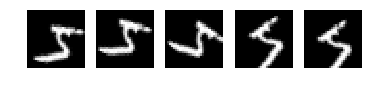

In [45]:
from matplotlib import pyplot as plt
gen = datagen.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [47]:
model1.fit_generator(datagen.flow(trainX,trainY,batch_size=32),samples_per_epoch=trainX.shape[0], nb_epoch=10,
                    validation_data=(testX,testY),callbacks=callback_list)

Epoch 1/10
  18/1875 [..............................] - ETA: 18s - loss: 1.2599 - acc: 0.7188

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  


1875/1875 [==============================] - 18s 10ms/step - loss: 0.2479 - acc: 0.9258 - val_loss: 0.0535 - val_acc: 0.9836
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1248 - acc: 0.9624 - val_loss: 0.0437 - val_acc: 0.9861
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1037 - acc: 0.9682 - val_loss: 0.0463 - val_acc: 0.9848
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0928 - acc: 0.9713 - val_loss: 0.0412 - val_acc: 0.9873
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0839 - acc: 0.9745 - val_loss: 0.0447 - val_acc: 0.9869
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0776 - acc: 0.9758 - val_loss: 0.0410 - val_acc: 0.9869
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0735 - acc: 0.9777 - val_loss: 0.0402 - val_acc: 0.9880
Epoch 8/10
1875/1875 [==============================] - 18s

###  Report the final train and validation accuracy

In [48]:
model1.evaluate(testX,testY)

10000/10000 [==============================] - 1s 53us/step


[0.03548625577387866, 0.9894]